In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import locale
locale.setlocale(locale.LC_ALL, 'pt-BR.UTF-8')

'pt-BR.UTF-8'

In [19]:
# Importando o dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
# Criar relações entre colunas
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

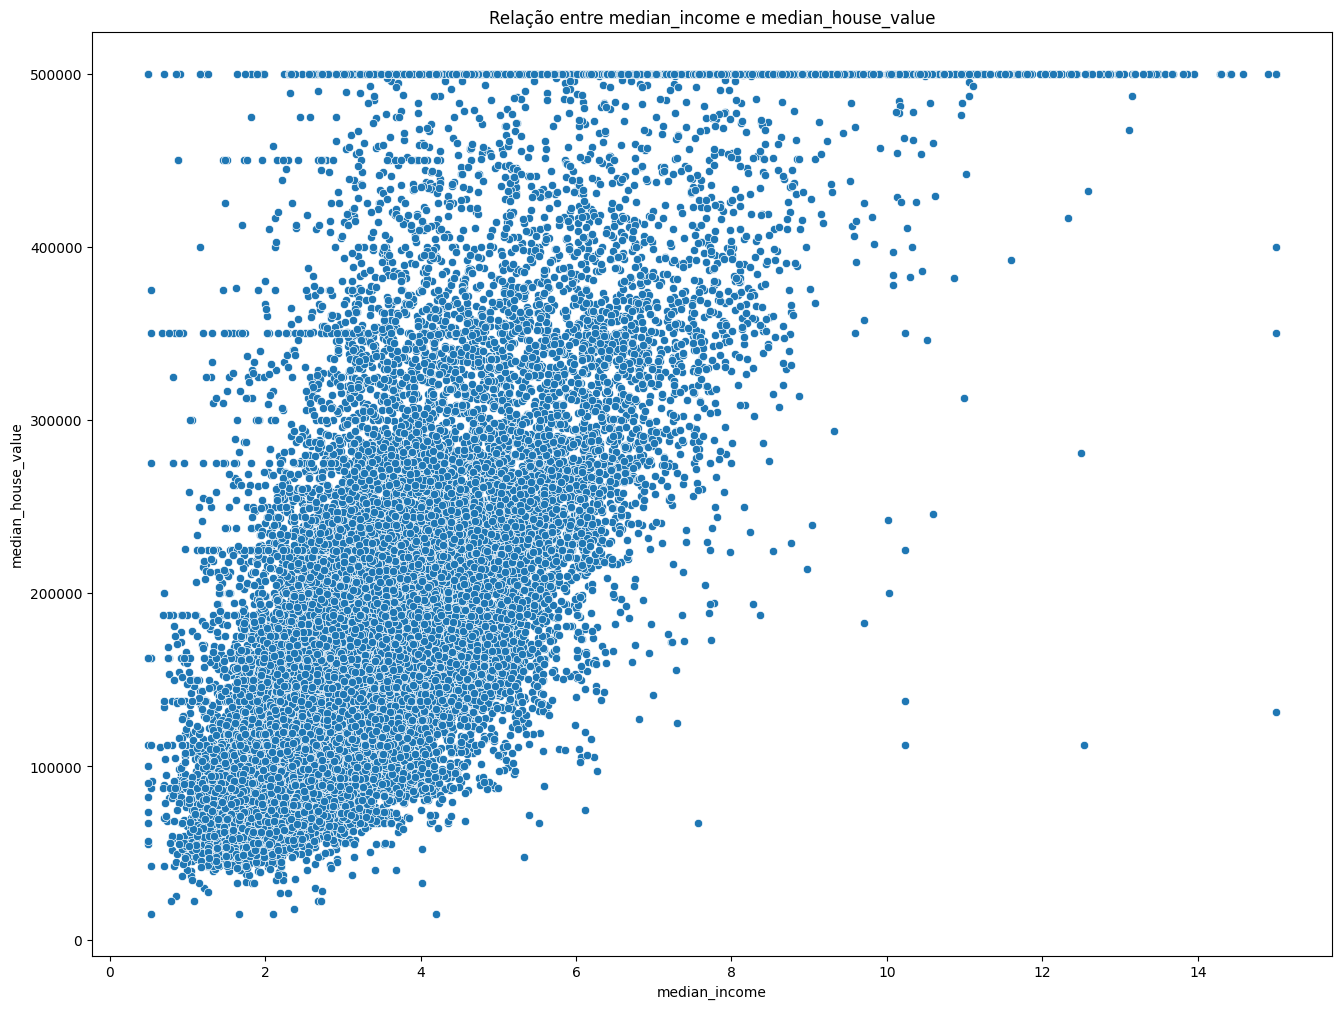

In [21]:
# Criar scatterplot
plt.figure(figsize=(16,12))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Relação entre median_income e median_house_value')
plt.show()

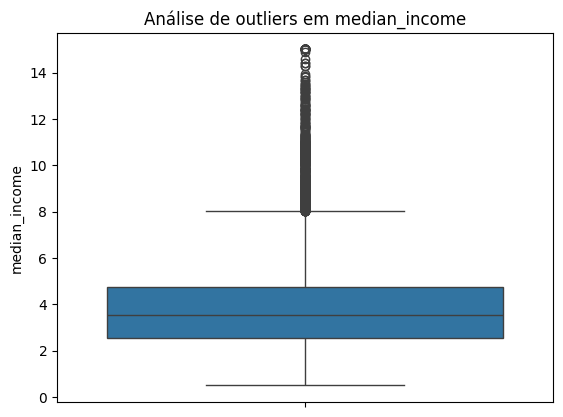

In [22]:
# Criar boxplot para identificar outliers
plt.figure()
sns.boxplot(data=df.drop('median_house_value', axis=1), y='median_income')
plt.title('Análise de outliers em median_income')
plt.show()

In [23]:
# Vamos aplicar o Z-Score para identificar exatamente quem são os outliers
z_scores_income = stats.zscore(df['median_income'])
z_scores_house_value = stats.zscore(df['median_house_value'])

outliers_income = [df['median_income'][i] for i, z in enumerate(z_scores_income) if abs(z) > 3]
outliers_house_value = [df['median_house_value'][i] for i, z in enumerate(z_scores_house_value) if abs(z) > 3]

print(f'Outliers do median_income: {outliers_income}')
print(f'Outliers do median_house_value: {outliers_house_value}')

Outliers do median_income: [11.6017, 10.0825, 11.8603, 13.499, 12.2138, 12.3804, 9.7194, 10.9506, 10.3203, 9.5862, 9.7037, 10.3345, 12.5915, 15.0001, 9.8708, 10.7372, 13.4883, 12.2478, 10.4549, 10.3224, 10.3713, 11.7064, 11.3421, 10.9405, 10.3416, 10.5815, 13.2949, 13.1499, 10.5144, 10.0263, 10.5941, 10.8805, 10.9052, 9.6047, 11.2093, 9.6465, 10.9201, 10.5511, 13.4196, 10.3587, 10.6796, 11.2979, 12.8879, 10.2292, 10.4399, 10.0549, 10.3599, 10.9237, 10.5575, 12.7823, 12.8763, 12.9591, 10.3661, 11.615, 15.0001, 10.2264, 15.0001, 15.0001, 15.0001, 11.2185, 15.0001, 10.586, 15.0001, 15.0001, 12.3767, 12.7296, 9.7449, 15.0001, 15.0001, 11.8442, 11.1978, 13.2935, 10.7937, 12.8665, 15.0001, 13.5728, 13.947, 15.0, 11.2866, 11.4233, 10.8082, 13.6842, 15.0001, 10.1882, 15.0001, 15.0001, 10.3467, 14.2867, 10.8045, 12.8483, 10.9805, 11.1768, 10.4519, 10.0, 12.0088, 12.1579, 9.5823, 11.1077, 10.1248, 9.7066, 9.8098, 15.0001, 15.0001, 10.2289, 9.8413, 15.0001, 15.0001, 15.0001, 11.7894, 10.7397, 11.

In [24]:
# Remover todos os outliers de median_income
df = df[~df['median_income'].isin(outliers_income)]

print(df['median_income'].isin(outliers_income))

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_income, Length: 20295, dtype: bool


In [25]:
# Identificar colunas com valores nulos
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

print(df_encoded.isna().any())

longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                 True
population                    False
households                    False
median_income                 False
median_house_value            False
rooms_per_household           False
bedrooms_per_room              True
population_per_household      False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool


In [26]:
# Preencher valores nulos com a média
nan_cols = ['total_bedrooms', 'median_income', 'bedrooms_per_room']
for col in nan_cols:
	df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())
df_encoded.isna().any()

longitude                     False
latitude                      False
housing_median_age            False
total_rooms                   False
total_bedrooms                False
population                    False
households                    False
median_income                 False
median_house_value            False
rooms_per_household           False
bedrooms_per_room             False
population_per_household      False
ocean_proximity_<1H OCEAN     False
ocean_proximity_INLAND        False
ocean_proximity_ISLAND        False
ocean_proximity_NEAR BAY      False
ocean_proximity_NEAR OCEAN    False
dtype: bool

In [27]:
# Separar X e y, normalizando X
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Tarefa: treine o modelo de regressão linear utilizando apenas as seguintes variáveis: median_income, housing_median_age, e rooms_per_household.
# Compare o desempenho do modelo treinado com essas variáveis com o modelo anterior que usava todas as variáveis disponíveis.
cols = ['median_income', 'housing_median_age', 'rooms_per_household']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_few, X_test_few, y_train_few, y_test_few = train_test_split(X[cols], y, test_size=0.3, random_state=42)

def train_and_evaluate(X_train, X_test, y_train, y_test):
	model = LinearRegression()
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test)

	mae = mean_absolute_error(y_test, y_pred)
	return mae

mae_all = train_and_evaluate(X_train_all, X_test_all, y_train_all, y_test_all)
mae_few = train_and_evaluate(X_train_few, X_test_few, y_train_few, y_test_few)

print("MAE com todas as colunas:", mae_all)
print("MAE com colunas selecionadas:", mae_few)

MAE com todas as colunas: 48544.47725828496
MAE com colunas selecionadas: 59134.13368376791


In [ ]:
# Implementação da Árvore de Decisão
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train_all, y_train_all)

y_pred_tree = model_tree.predict(X_test_all)

mae_dt = mean_absolute_error(y_test_all, y_pred_tree)
print("MAE da Árvore de Decisão:", mae_dt)

MAE da Árvore de Decisão: 45139.50550172442


In [ ]:
# Teste interativo
test = 0

while True:
	test = input("- Digite um índice de 0 até 6089")
	try: 
		test = int(test)
		if not 0 <= test <= 6089:
			print("- Digite um número no intervalo descrito")
			continue
	except ValueError:
		print("- Escreva um número inteiro válido")
		continue
	break

print(f"Valor previsto: {locale.currency(model_tree.predict(X_test_all)[test], grouping=True)}")
print(f"Valor real: {locale.currency(y_test_all.iloc[test], grouping=True)}")

Valor previsto: R$ 271.300,00
Valor real: R$ 236.200,00
